### 25e November

# CNN, 

Convolutional Neural Network

begrepp:
- image kernel
    - shader (i dataspel) använder detta blandannat
    - https://setosa.io/ev/image-kernels/
    - i en bild, gör matrispultiplikation över ett 3x3 grid
    - till sätt en bias till varje "node" i uträkningen för att få olika förvärningar
    - man flyttar grid tills man täckt hela bilden.
        - gör man det ett steg i taget kallas det "stride"
    - En CNN lär sig kernelfunktionen men inlärda vikter istället för de som står på sidan

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

sns.set_style("white")

current_dir = os.path.abspath("")
data_dir = os.path.abspath("../data")

current_dir, data_dir

('c:\\KODA\\ITHS\\9_Deep Learning\\DeepLearning\\lectures',
 'c:\\KODA\\ITHS\\9_Deep Learning\\DeepLearning\\data')

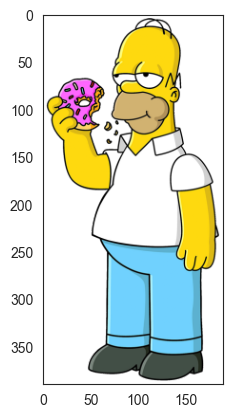

In [9]:
img = plt.imread(os.path.join(data_dir, "Homer_Simpson_2006.png"))
plt.imshow(img)

(195, 95, 4)

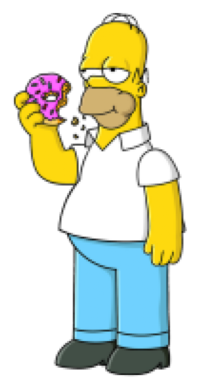

In [10]:
import cv2

resize_factor = .5
new_size = int(img.shape[1] * resize_factor), int(img.shape[0] * resize_factor)

img = cv2.resize(img, new_size)
plt.imshow(img)
plt.axis("off")
img.shape

In [15]:
edge_filter = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

blur_filter = np.array([[.0625, .125, .0625],
                        [.125, .25, .125],
                        [.0625, .125, .0625]])

outline_filter = np.array([[-1, -1, -1],
                            [-1, 8, -1], # orginal mitten = 8
                            [-1, -1, -1]])

filters = [edge_filter, blur_filter, outline_filter]
filternames = ["Edge", "Blur", "Outline"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3568628..2.3813725].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5.0..5.0].


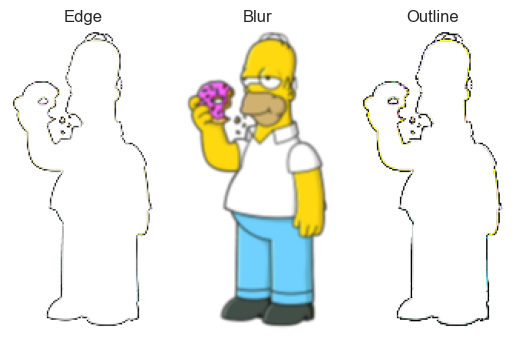

In [16]:
processed_img_path = f"{data_dir}/processed_imgs"

try:
    os.mkdir(processed_img_path)
except FileExistsError as err:
    pass

fig, ax = plt.subplots(1, len(filters))

for ax, filter, filtername in zip(ax, filters, filternames):
    filtered_img = cv2.filter2D(img, -1, kernel=filter)
    ax.imshow(filtered_img)
    ax.axis("off")
    ax.set_title(filtername)

plt.savefig(f"{processed_img_path}/filtered_img.png")

In [19]:
import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1)).astype("float32") / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype("float32") / 255

In [20]:
from keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8852 - loss: 0.3703
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9841 - loss: 0.0501
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9905 - loss: 0.0307
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9916 - loss: 0.0248
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9950 - loss: 0.0179


In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
(test_loss, test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9866 - loss: 0.0402


(0.029103191569447517, 0.9905999898910522)